**Background Story**

*The dataset can be accessed through the following link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn*

One of the Chief Marketing Officers (CMO) of a company in the telecommunications industry wants to minimize the problems that often occur in his business, namely customer churn. He wants to know the
habit patterns of customers who will then create machine learning models to be able to guess whether they churn or not in the next period.

Based on the problem, as a Data Analytics & Science role, make the right analysis and model to solve the project!

**Importing Library**

In [ ]:
!pip install lightgbm
!pip install xgboost
!pip install optuna
!pip install imbalanced-learn

#Standard libraries for data analysis:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib
import lightgbm as lgb
import xgboost as xgb
from imblearn.over_sampling import SMOTE

We want to know what columns and rows are contained in the dataset, so we need to do the data reading phase first.

**Data Reading**

In [2]:
df = pd.read_excel('telco_churn_portofolio.xlsx')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


From dataset above, we can draw an analysis as follows:

**1.User Personal Information**


*   Gender: Whether the client is a female or a male (Female, Male).
*   Partner: Whether the client has a partner or not (0, 1).
*   Senior Citizen: Whether the client is a senior citizen or not (Yes, No).
*   Dependents: Whether the client has dependents or not (Yes, No).

**2.User Account Information**
*   Tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
*   Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
*   Payment Method: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
*   Monthly Charges: The amount charged to the customer monthly (Multiple different numeric values).
*   Total Charges: The total amount charged to the customer (Multiple different numeric values).
*   Paperless Billing: Whether the client has paperless billing or not (Yes, No).  
   
**3.User Services Information**
*   InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
*   OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).
*   PhoneService: Whether the client has a phone service or not (Yes, No).
*   MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).
*   OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).
*   DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).
*   TechSupport: Whether the client has tech support or not (No internet service, No, Yes).
*   StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).
*   StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).



**Data Cleansing**

Deeper descriptive analysis and visualization are needed to find out whether the dataset is neat or not.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Based on the analysis that has been done, **there are no missing values or null values**, but there are columns that do not match the data type. The Total Charges column needs to be transformed into a numeric variable because it contains the total amount charged to the customer.

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
df.dropna(inplace=True)

After the columns are transformed, we now need to delete the customerID column and the 'automatic' row in Payment Method because they are not needed.

In [9]:
df.drop(columns='customerID', inplace=True)

df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)','',regex=False)
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

**Exploratory Data Analysis - Univariate Analysis**

Once the dataset is ready, we apply 2 phases of EDA, namely **Univariate** and **Bivariate** analysis, to visualize, understand and interpret the distribution patterns contained in the dataset.

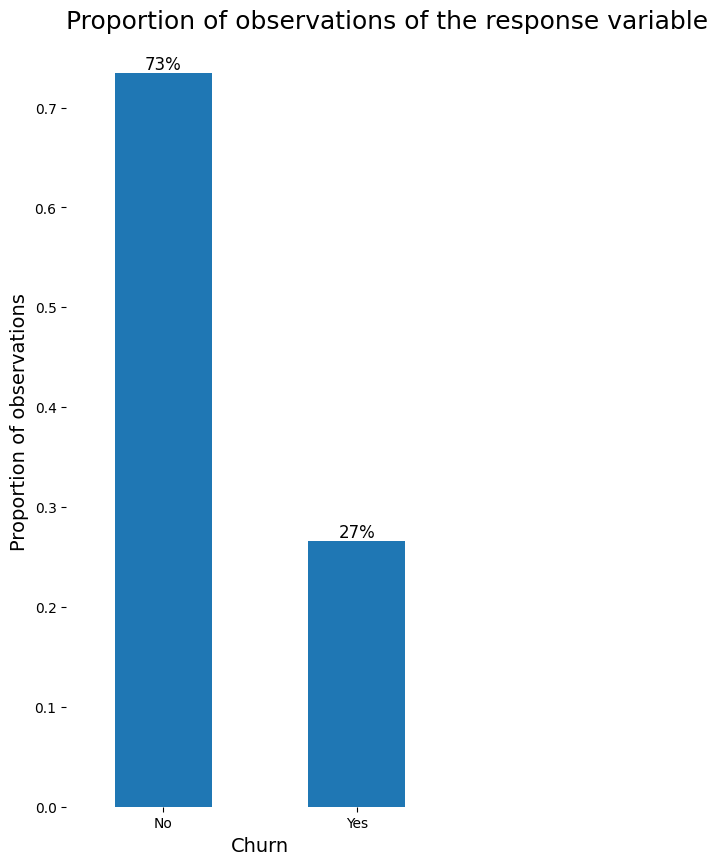

In [ ]:
# Create a figure
fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot(111)

# Proportion of observation of each class
prop_response = df['Churn'].value_counts(normalize=True)

# Create a bar plot showing the percentage of churn
ax = prop_response.plot(kind='bar', ax=ax)

# Set title and labels
ax.set_title('Proportion of observations of the response variable', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Proportion of observations', fontsize=14)
ax.tick_params(rotation='auto')

# Eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

# Annotate the bars with the rounded proportion values as percentages
for i, val in enumerate(prop_response):
    ax.text(i, val, f'{val*100:.0f}%', ha='center', va='bottom', fontsize=12)

plt.show()

Text(0.5, 1.0, 'Male Counts vs Female Counts')

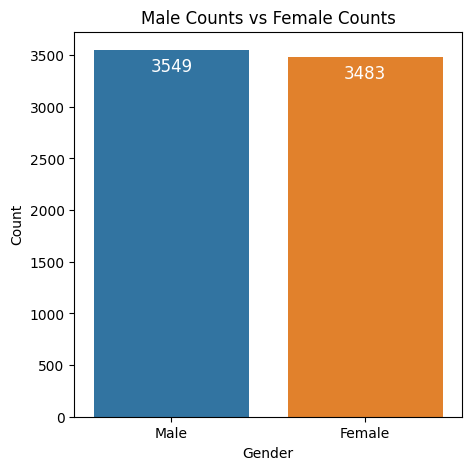

In [ ]:
gender_count = df.gender.value_counts()

plt.figure(figsize=(5,5))
ax = sns.barplot(x= gender_count.index, y= gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='white', xytext=(0, -12),
                textcoords='offset points')
plt.title('Male Counts vs Female Counts')

<function matplotlib.pyplot.show(close=None, block=None)>

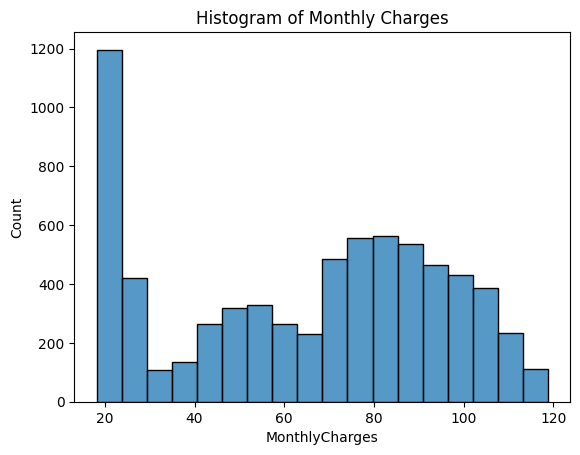

In [ ]:
sns.histplot(df.MonthlyCharges)
plt.title('Histogram of Monthly Charges')
plt.show

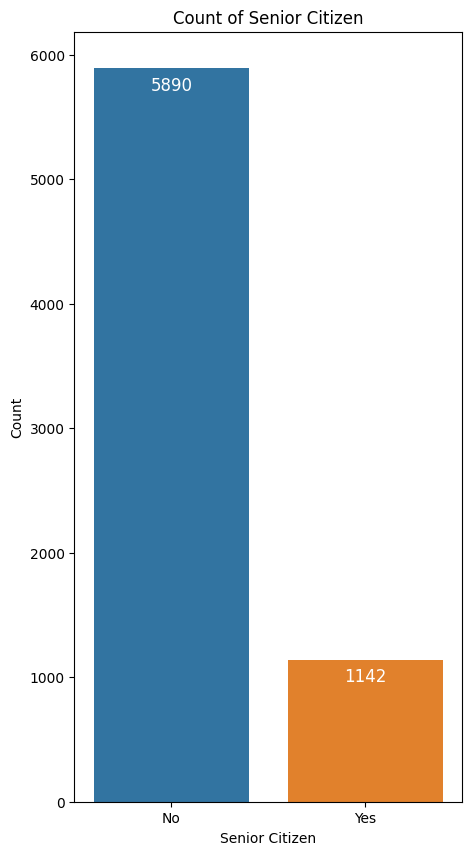

In [ ]:
senior_citizen_count = df.SeniorCitizen.value_counts()

plt.figure(figsize=(5,10))
ax = sns.barplot(x=senior_citizen_count.index, y= senior_citizen_count.values)
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.title('Count of Senior Citizen')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='white', xytext=(0, -12),
                textcoords='offset points')

plt.show()

Based from univariate analysis above, it can be concluded such as:
1.   Through the chart above, it can be said that the proportion of **churn rate** in this company is **27%**, which is a **high number** considering the market in the telecommunications industry is quite competitive.
2.  The gender distribution proportion of males (50.5%) was more than that of females (49.5%).
3.   MonthlyCharges histogram distribution illustrates that on a monthly basis, **most customers spend from the range of 70$ - 110$**, but the largest proportion is found in customers with a range of 20$.  
4.   The proportion of Senior Citizen distribution is dominated by young people (83.4%) while senior people only (16.6%).

**Bivariate Analysis**

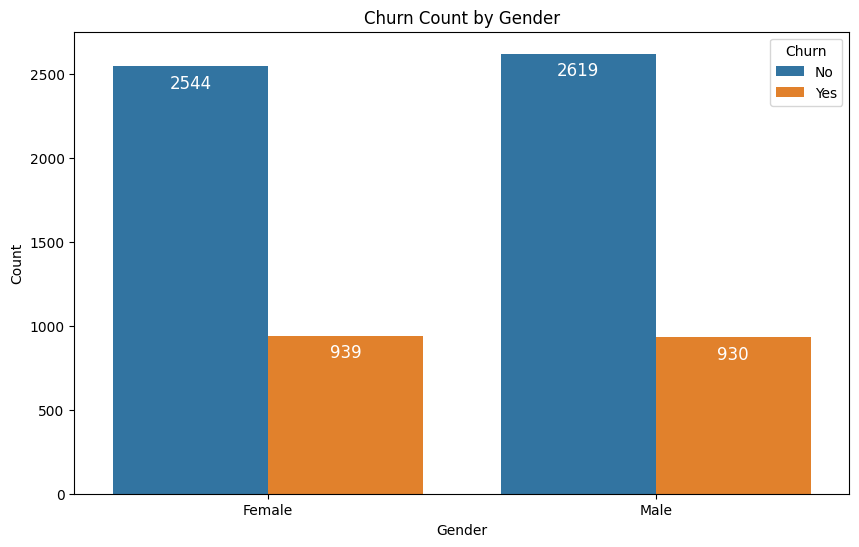

In [11]:
df = pd.DataFrame(df)

df['gender'] = df['gender'].astype("category")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x="gender", hue="Churn", data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn Count by Gender")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='white', xytext=(0, -12),
                textcoords='offset points')
plt.show()

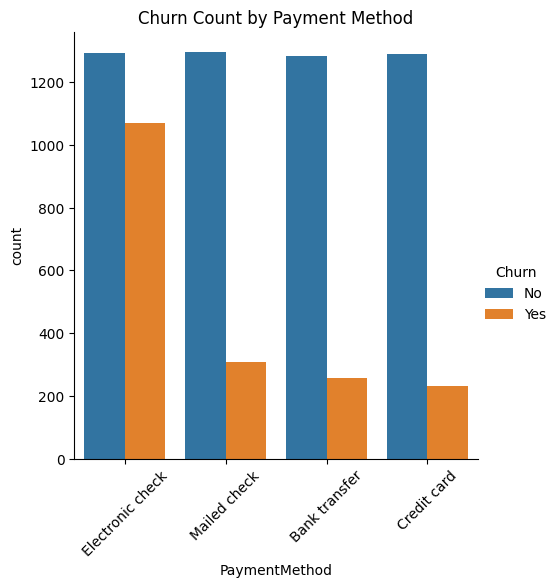

In [ ]:
sns.catplot(x='PaymentMethod', hue='Churn', kind='count', data=df)
plt.xticks(rotation=45)
plt.title('Churn Count by Payment Method')
plt.show()

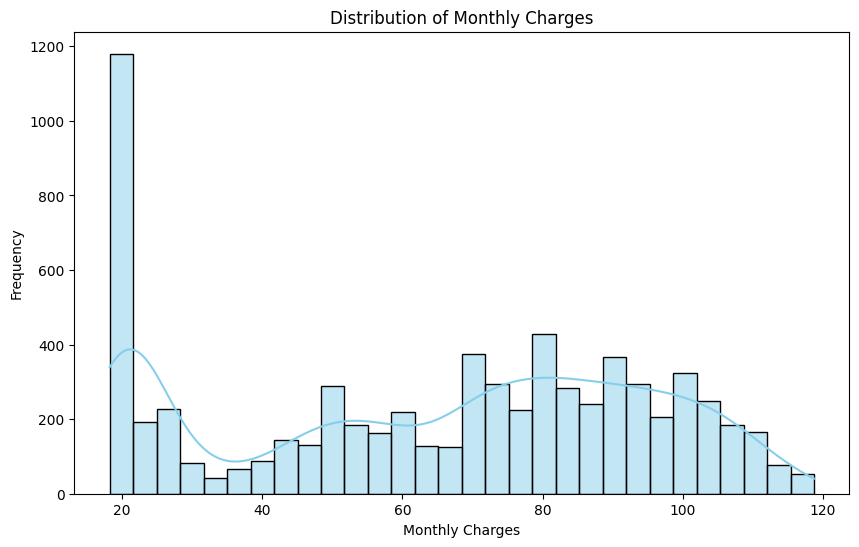

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="MonthlyCharges", bins=30, kde=True ,color='skyblue')

# Add labels and title
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.title("Distribution of Monthly Charges")

# Show the plot
plt.show()

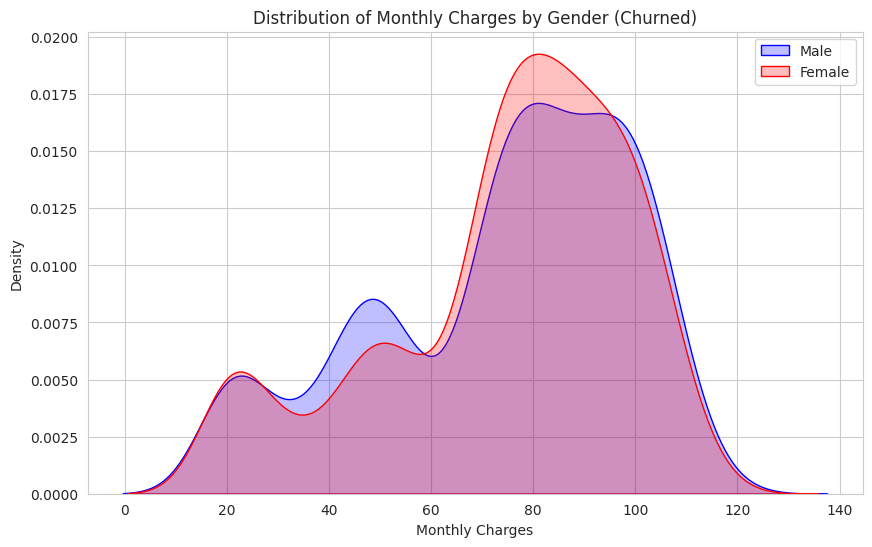

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Filter the dataset for only male customers who churned
male_churned = df[(df['gender'] == 'Male') & (df['Churn'] == 'Yes')]

# Filter the dataset for only female customers who churned
female_churned = df[(df['gender'] == 'Female') & (df['Churn'] == 'Yes')]

# Plot the distribution of MonthlyCharges for male customers who churned
sns.kdeplot(data=male_churned, x='MonthlyCharges', color='blue', label='Male', fill=True)

# Plot the distribution of MonthlyCharges for female customers who churned
sns.kdeplot(data=female_churned, x='MonthlyCharges', color='red', label='Female', fill=True)

# Add labels and title
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.title("Distribution of Monthly Charges by Gender (Churned)")

# Add legend
plt.legend()

# Show the plot
plt.show()

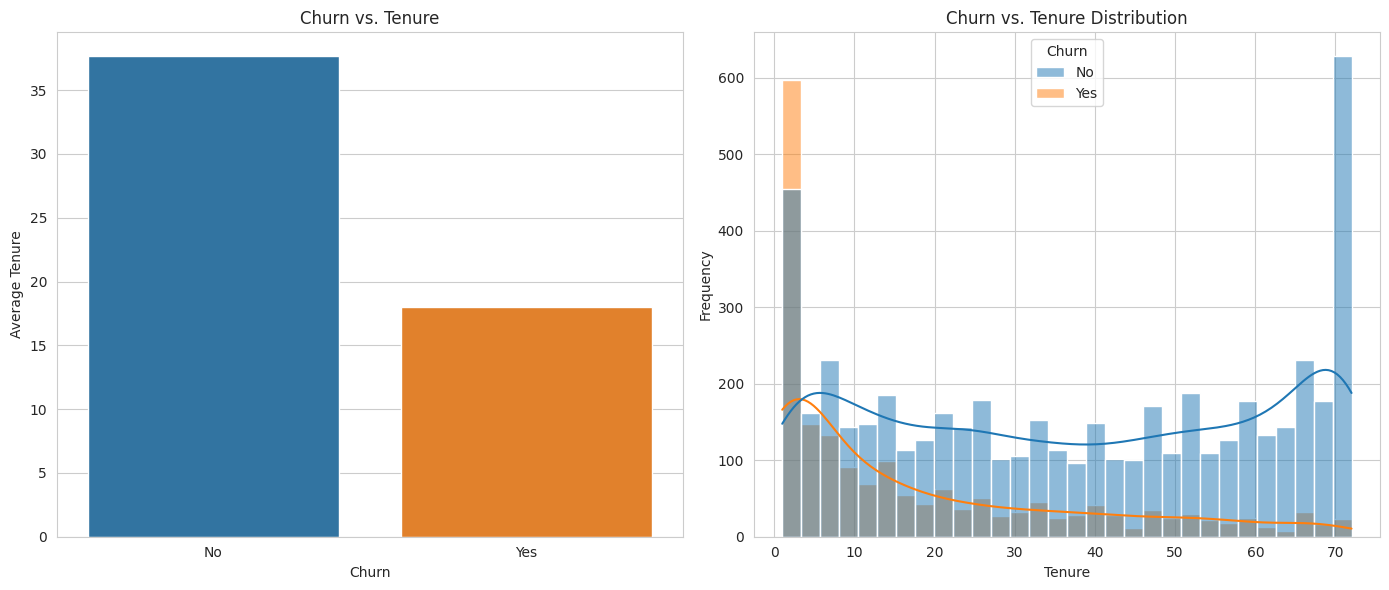

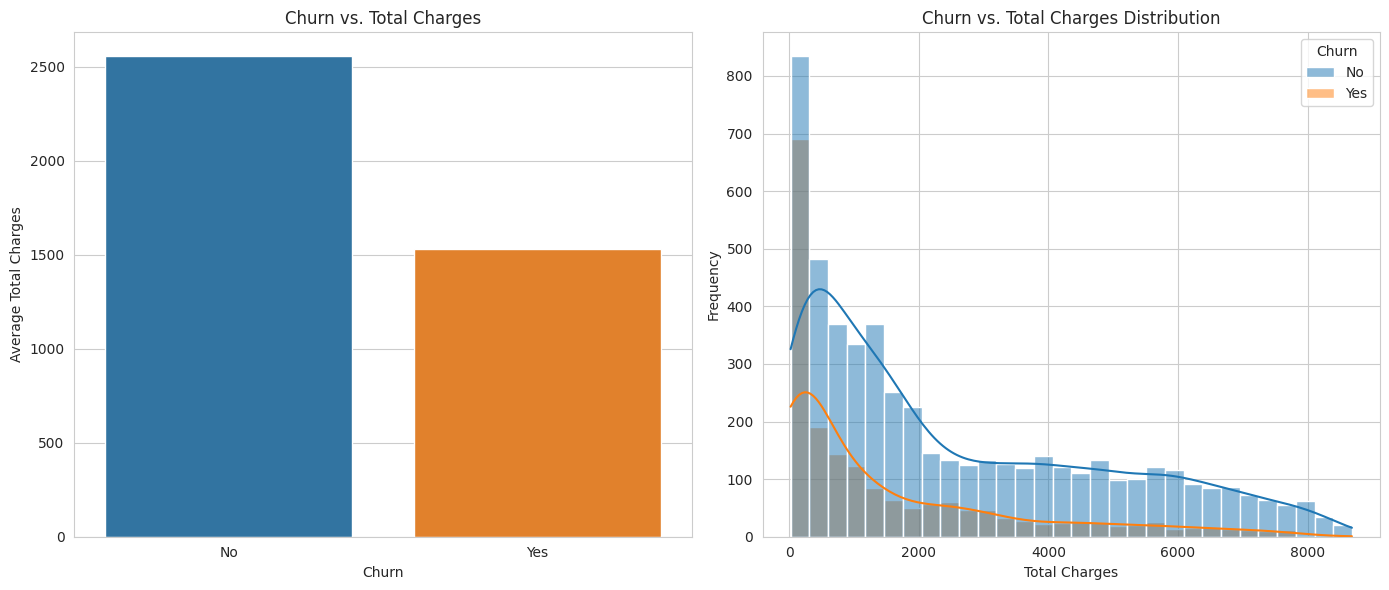

In [ ]:
plt.figure(figsize=(14, 6))

# Subplot 1: Churn vs. Tenure using bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=df, x="Churn", y="tenure",  errorbar=None)
plt.xlabel("Churn")
plt.ylabel("Average Tenure")
plt.title("Churn vs. Tenure")

# Subplot 2: Churn vs. Tenure using histplot
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True)
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.title("Churn vs. Tenure Distribution")

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

# Create subplots for the analysis
plt.figure(figsize=(14, 6))

# Subplot 1: Churn vs. TotalCharges using bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=df, x="Churn", y="TotalCharges", errorbar=None)
plt.xlabel("Churn")
plt.ylabel("Average Total Charges")
plt.title("Churn vs. Total Charges")

# Subplot 2: Churn vs. TotalCharges using histplot
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="TotalCharges", hue="Churn", bins=30, kde=True)
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.title("Churn vs. Total Charges Distribution")

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

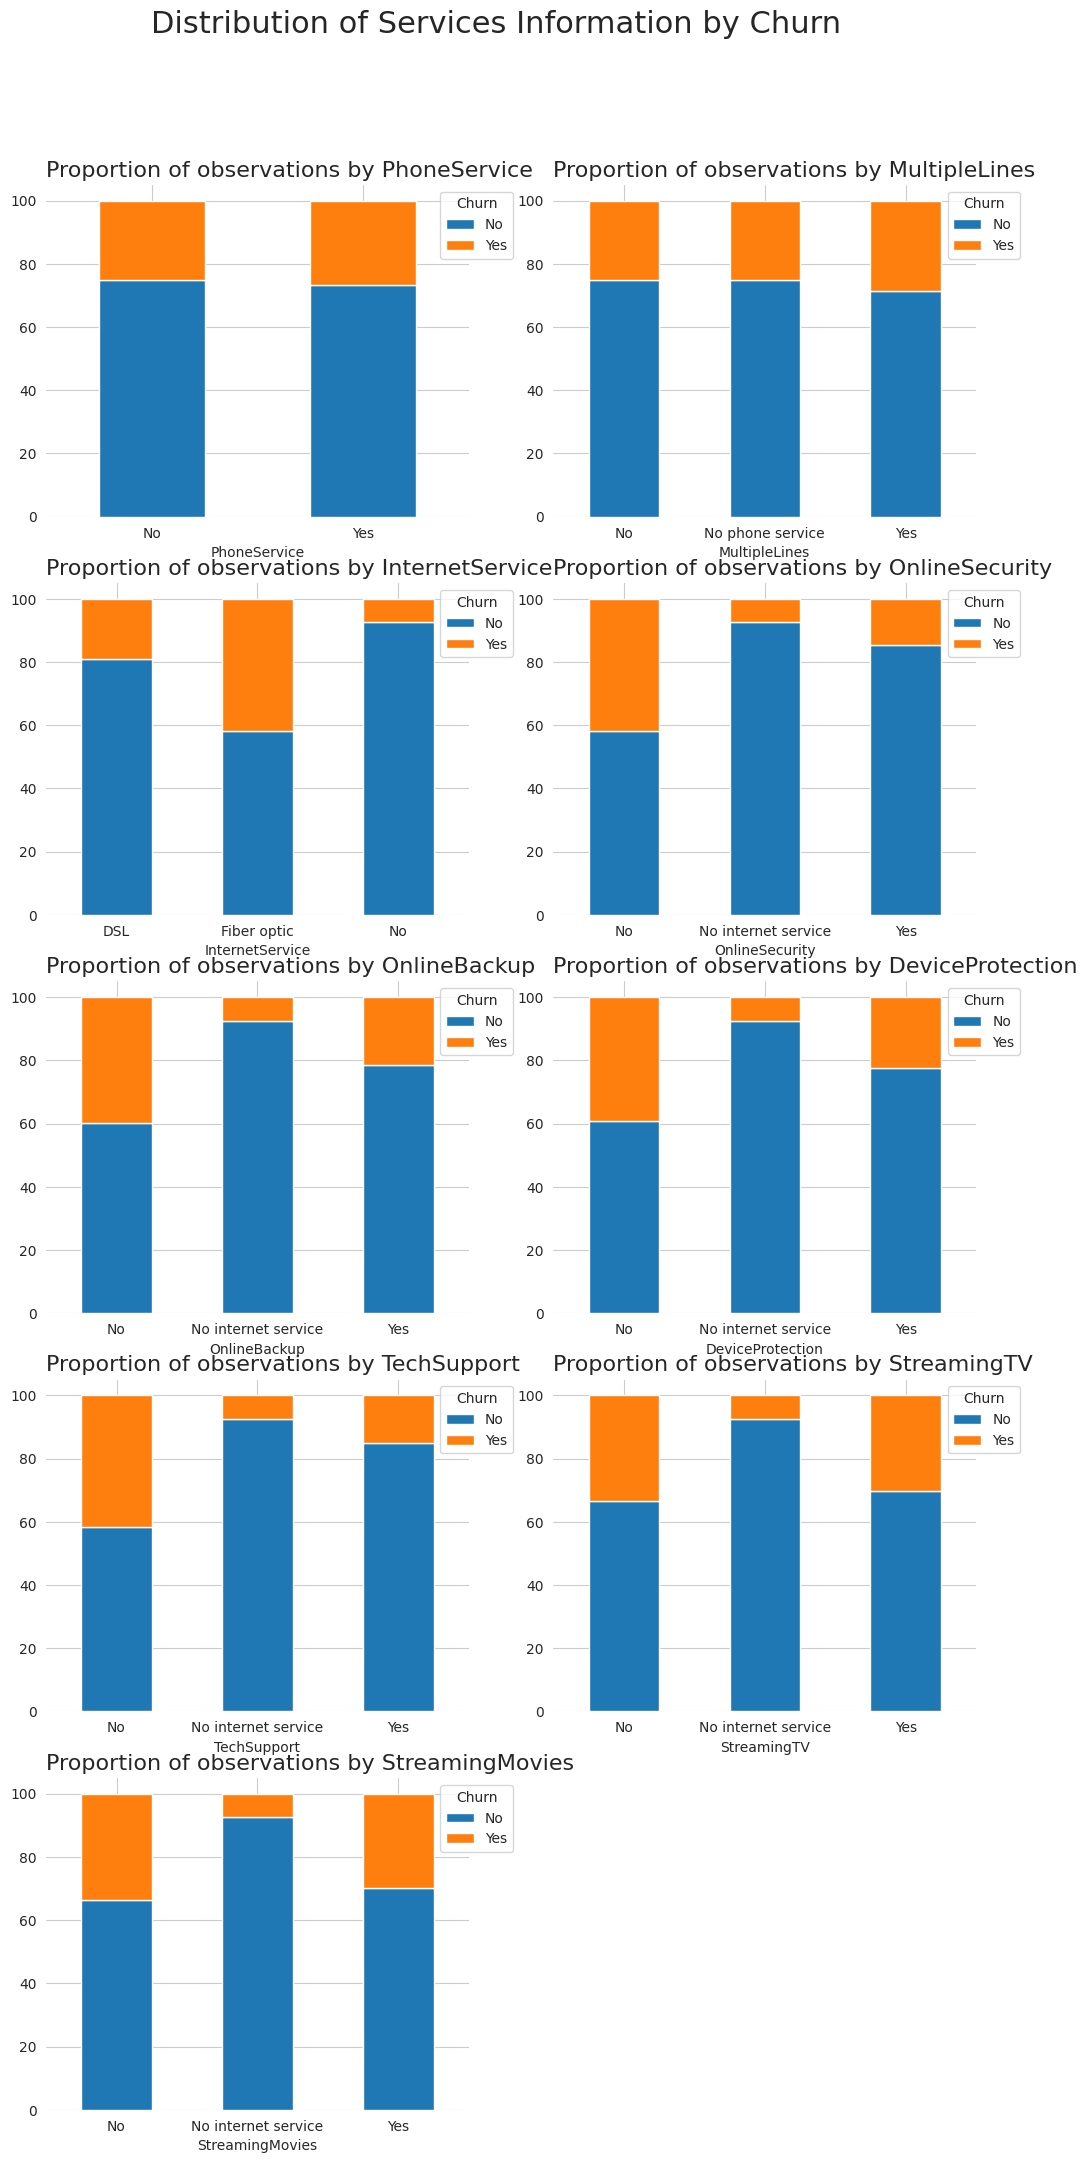

In [ ]:
import math

def percentage_stacked_plot(columns_to_plot, super_title):
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
    Parameters:
        columns_to_plot (list of string): Names of the variables to plot
        super_title (string): Super title of the visualization
    Returns:
        None
    '''
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22, y=.95)

    # loop through each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x / x.sum() * 100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0)

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

# Example usage:
columns_to_plot = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
super_title = 'Distribution of Services Information by Churn'
percentage_stacked_plot(columns_to_plot, super_title)
plt.show()

Based from bivariate analysis above, it can be concluded such as:
1.   Low tenure customer tends to churn rather than high tenure customer while High spent customer more loyal than low spent customer
2.   Based on churn rate, female gender is higher than male..
3.   Based on the payment method, Electronic check has a high churn rate compared to other payment methods.
4.   Service information categories are unique to their respective segments, so it can be seen that overall they cannot be compared with each other.


**Feature Engineering - One Hot Encoding and Label Encoder**

Now we need to transform all numerical columns into categorical variables. We using One Hot Encoding and Label Encoder to a few columns that suit the methods

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_transformed = df.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_transformed[column] = df_transformed[column].map({'Female': 1, 'Male': 0})
    else:
        df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0})

In [ ]:
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)

In [ ]:
df_transformed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


**Normalization using Standard Scaler**

After the feature engineering phase, it's time to normalize all the data so that the distribution is even.

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Define the columns to be scaled
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fit and transform the selected columns using StandardScaler
df_transformed[columns_to_scale] = scaler.fit_transform(df_transformed[columns_to_scale])

In [ ]:
nan_check = df_transformed.isna().sum()

# Display columns with NaN values (if any)
columns_with_nan = nan_check[nan_check > 0]
if not columns_with_nan.empty:
    print("Columns with NaN values:")
    print(columns_with_nan)
else:
    print("No NaN values in the dataset")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,-0.343137,1,1,0.664868,-0.129180,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,1.612573,1,1,1.276493,2.241056,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,-0.872808,0,1,-1.170004,-0.854514,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,-1.158016,1,1,0.319168,-0.872095,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
df_transformed

**Split Train and Test Set**

In [ ]:
# select independent variables
X = df_transformed.drop(columns='Churn')

# select dependent variables
y = df_transformed.loc[:, 'Churn']

# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=22, shuffle=True)

**Using SMOTE to handling imbalance data**

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=99)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({0: 4132, 1: 4132})


In [ ]:
nan_check = X_resampled.isna().sum()

# Display columns with NaN values (if any)
columns_with_nan = nan_check[nan_check > 0]
if not columns_with_nan.empty:
    print("Columns with NaN values:")
    print(columns_with_nan)
else:
    print("No NaN values in the dataset")

Columns with NaN values:
gender    512
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy='mean')

# Fit and transform your feature matrix
X_resampled_imputed = imputer.fit_transform(X_resampled)

**Finding Best Algorithm using K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

models = [
    ('LGBM', lgb.LGBMClassifier(n_estimators=50, force_col_wise= True)),
    ('Random Forest', RandomForestClassifier(n_estimators=50)),
    ('Logistic Regression', LogisticRegression(solver='lbfgs', max_iter=1000)),
    ('XGBoost', xgb.XGBClassifier(n_estimators=50)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB())
]

results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracy = cross_val_score(model, X_resampled_imputed, y_resampled, cv=kfold, scoring='accuracy')
    precision = cross_val_score(model, X_resampled_imputed, y_resampled, cv=kfold, scoring='precision')
    recall = cross_val_score(model, X_resampled_imputed, y_resampled, cv=kfold, scoring='recall')
    f1 = cross_val_score(model, X_resampled_imputed, y_resampled, cv=kfold, scoring='f1')

    results['Model'].append(name)
    results['Accuracy'].append(np.mean(accuracy))
    results['Precision'].append(np.mean(precision))
    results['Recall'].append(np.mean(recall))
    results['F1-Score'].append(np.mean(f1))

results_df = pd.DataFrame(results)
print(results_df)

[LightGBM] [Info] Number of positive: 3719, number of negative: 3718
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 7437, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500067 -> initscore=0.000269
[LightGBM] [Info] Start training from score 0.000269
[LightGBM] [Info] Number of positive: 3719, number of negative: 3718
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 7437, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500067 -> initscore=0.000269
[LightGBM] [Info] Start training from score 0.000269
[LightGBM] [Info] Number of positive: 3718, number of negative: 3719
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 7437, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499933 -> initscore=-0.000269
[LightGBM] [Info] Start training from score -0.000269
[LightGBM] [Info] Nu

From the results of algorithm comparison using K-Fold CV, Random Forest successfully outperformed all other algorithms. Furthermore, we use Hyperparameter Tuning to produce optimal metric evaluation results.

**Model Selected - Random Forest - Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=99)
param_grid = {
              'max_features':['sqrt','log2'],
              'criterion':['gini','entropy'],
              'max_depth':[5,10],
              'max_leaf_nodes': [10, 15, 20],
              'min_samples_leaf': [2, 4, 6, 8],
              'max_samples': [0.1, 0.2, 0.3],
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled_imputed, y_resampled)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

accuracy = best_rf_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 20, 'max_samples': 0.3, 'min_samples_leaf': 2}
Test Accuracy: 0.7619047619047619


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
opt_param = {
              'n_estimators': 200,
              'criterion': 'gini',
              'min_samples_split': 10 ,
              'max_leaf_nodes': 20,
              'min_samples_leaf': 2,
              'max_depth': 10,
              'max_features': 'log2'
}

In [ ]:
clf_final = RandomForestClassifier(random_state = 99, **opt_param)

In [ ]:
# Define the number of folds for k-fold cross-validation
num_folds = 5

# Create a StratifiedKFold object for cross-validation
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
results = []

for train_idx, test_idx in kfold.split(X, y):
    X_resampled_imputed, X_test = X[train_idx], X[test_idx]
    y_resampled, y_test = y[train_idx], y[test_idx]

    # Fit the classifier on the training data
    clf_final.fit(X_resampled_imputed, y_resampled)

    # Make predictions on the test data
    y_pred = clf_final.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate sensitivity (true positive rate) and specificity (true negative rate)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Store metrics in a dictionary
    metrics_dict = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    }

    results.append(metrics_dict)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Calculate and print the mean metrics
mean_metrics = results_df.mean()

print("Result Metrics (mean):")
print(mean_metrics)

Result Metrics (mean):
Accuracy       0.780736
Precision      0.782025
Recall         0.780736
F1 Score       0.780490
Sensitivity    0.812923
Specificity    0.748555
dtype: float64


**Model Evaluation**

In this project, we use several evaluation metrics such as Confusion Matrix, Learning Curve, and ROC Curve to see whether the model is over-fitting or not.

**Confusion Matrix**

Text(0.5, 14.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

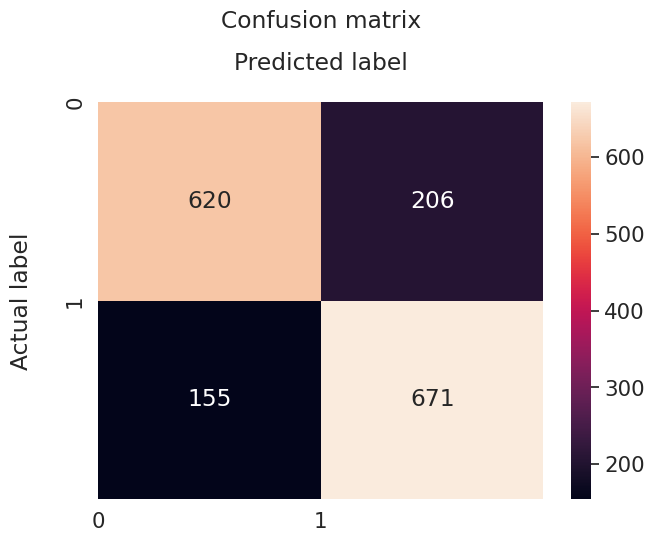

In [ ]:
y_pred = clf_final.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu"
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

**Learning Curve**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters:
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if 'y' is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if 'y' is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise, it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

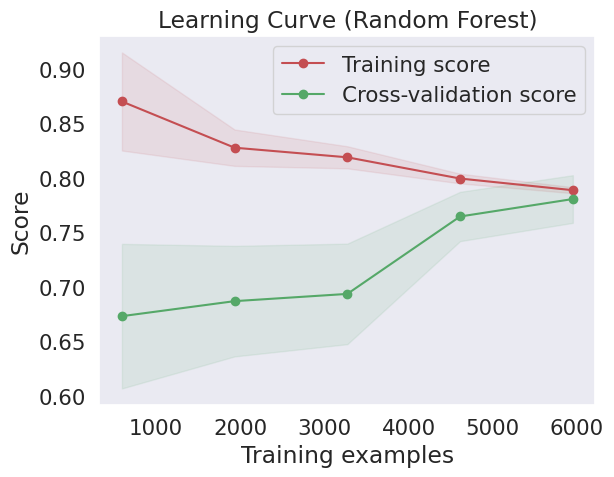

In [ ]:
# Load a sample dataset (you can replace it with your own dataset)
X, y = X_resampled_imputed, y_resampled

# Define the classifier (you can use any classifier)
classifier = clf_final

# Plot the learning curve
title = "Learning Curve (Random Forest)"
cv = 10  # Number of cross-validation folds
plot_learning_curve(classifier, title, X, y, cv=cv)

plt.show()

**ROC Curve**

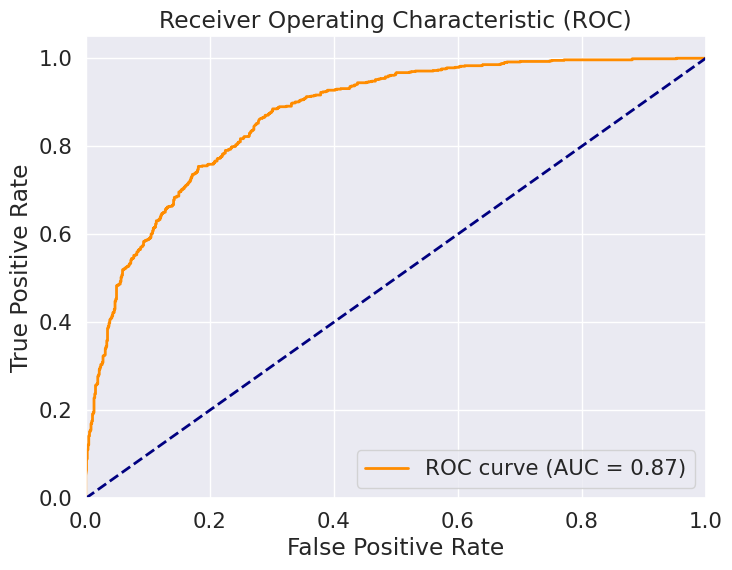

In [ ]:
classifier = clf_final
classifier.fit(X_resampled_imputed, y_resampled)

y_prob = classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

conf_matrix = [[620, 206],
               [155, 671]]

# Call the confusion_metrics function and pass the confusion matrix
confusion_metrics(conf_matrix)

True Positives: 671
True Negatives: 620
False Positives: 206
False Negatives: 155
--------------------------------------------------
Accuracy: 0.78
Mis-Classification: 0.22
Sensitivity: 0.81
Specificity: 0.75
Precision: 0.75
f_1 Score: 0.78


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       826
           1       0.77      0.81      0.79       826

    accuracy                           0.78      1652
   macro avg       0.78      0.78      0.78      1652
weighted avg       0.78      0.78      0.78      1652

